::: callout-caution
* Import necessary libraries

:::

In [1]:
#| code-fold: true
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#| code-fold: true
url = ('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
data = pd.read_csv(url, header=0, index_col=0, parse_dates=True)
print(data.head())

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


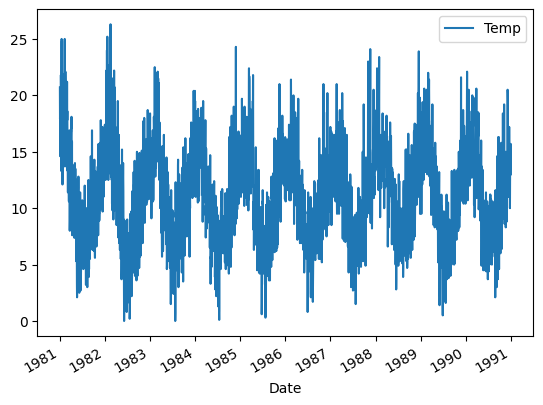

In [4]:
#| code-fold: true
# Line plot
data.plot()
plt.show()

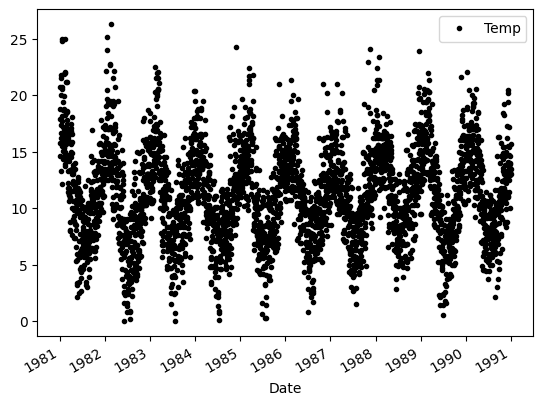

In [5]:
#| code-fold: true
url_1 = ('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
data_1 = pd.read_csv(url_1, header=0, index_col=0, parse_dates=True)
data_1.plot(style='k.')
plt.show()


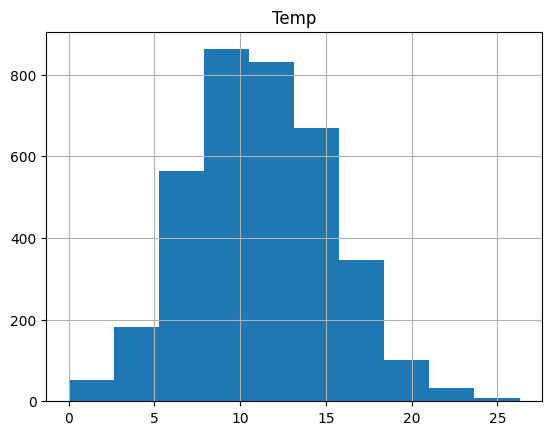

In [6]:
#| code-fold: true
# Histogram and density plots
data.hist()
plt.show()


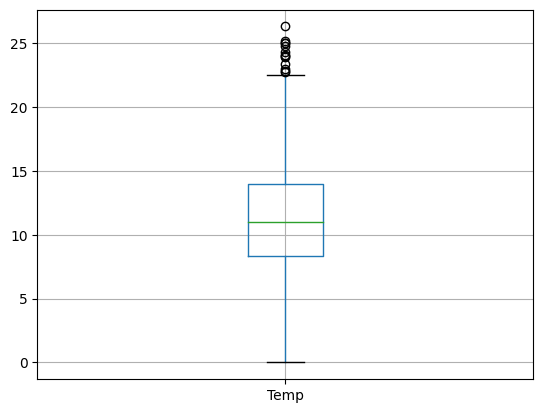

In [7]:
#| code-fold: true
# Box and whisker plots
data.boxplot()
plt.show()

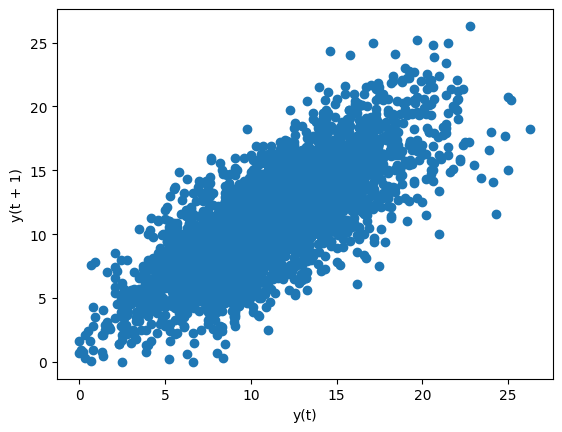

In [8]:
#| code-fold: true
# Time series lag scatter plots
from pandas.plotting import lag_plot
lag_plot(data)
plt.show()


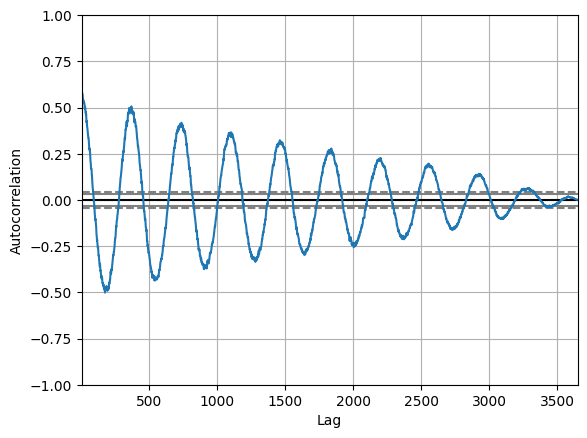

In [9]:
#| code-fold: true
# Time series correlation scatter plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data)
plt.show()


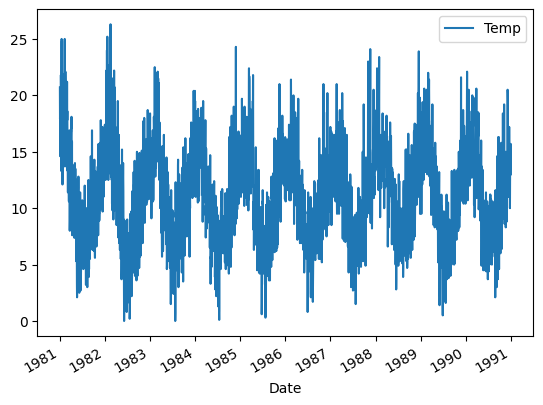

In [11]:
#| code-fold: true
data_1.plot()
plt.show()


::: callout-tip

# Seasonal adjustment with Differencing
:::

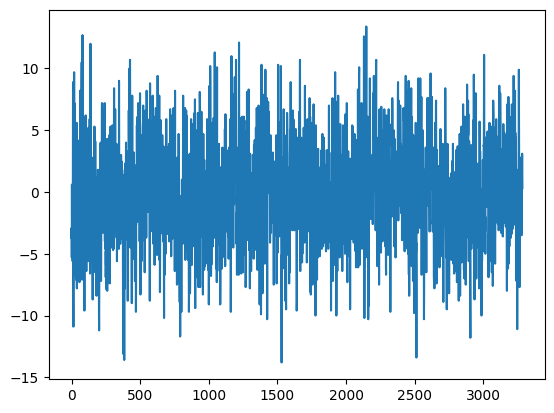

In [13]:
#| code-fold: true
X = data_1.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff.append(value)
plt.plot(diff)
plt.show()



                 Temp
Date                 
1981-01-31  17.712903
1981-02-28  17.678571
1981-03-31  13.500000
1981-04-30  12.356667
1981-05-31   9.490323
1981-06-30   7.306667
1981-07-31   7.577419
1981-08-31   7.238710
1981-09-30  10.143333
1981-10-31  10.087097
1981-11-30  11.890000
1981-12-31  13.680645
1982-01-31  16.567742


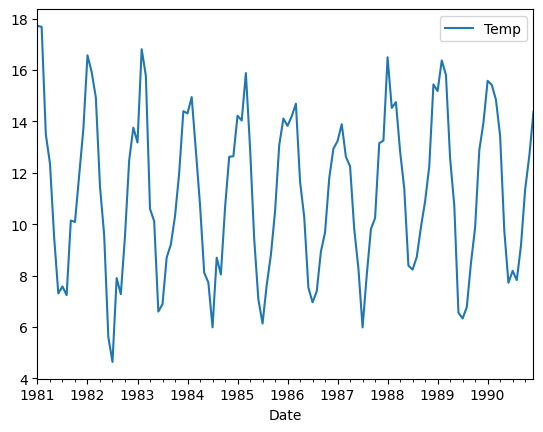

In [14]:
#| code-fold: true
#resample the dataset to a monthly average minimum temperature
resample = data_1.resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head(13))
monthly_mean.plot()
plt.show()

                 Temp
Date                 
1981-03-31  16.251111
1981-06-30   9.715385
1981-09-30   8.300000
1981-12-31  11.885870
1982-03-31  15.804444
1982-06-30   8.894505
1982-09-30   6.601087
1982-12-31  11.922826
1983-03-31  15.203333
1983-06-30   9.115385
1983-09-30   8.258696
1983-12-31  12.236957
1984-03-31  14.020879


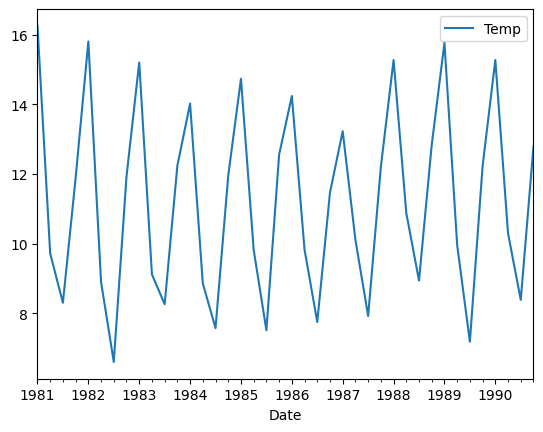

In [16]:
#| code-fold: true
resample = data_1.resample('Q')
quarterly_mean = resample.mean()
print(quarterly_mean.head(13))
quarterly_mean.plot()
plt.show()


                 Temp
Date                 
1981-12-31  11.517260
1982-12-31  10.783562
1983-12-31  11.187397
1984-12-31  10.591781
1985-12-31  11.137534
1986-12-31  10.803288
1987-12-31  10.853151
1988-12-31  11.972055
1989-12-31  11.261918
1990-12-31  11.669589


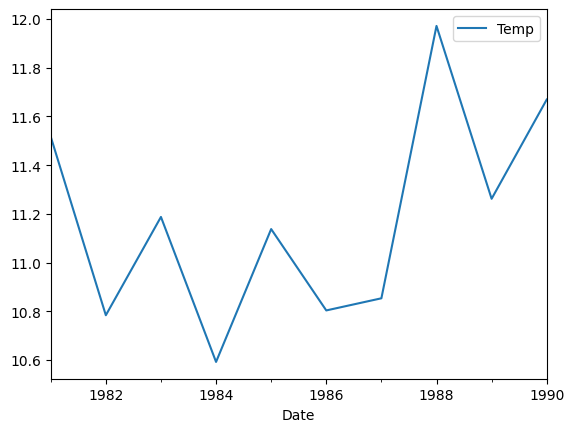

In [17]:
#| code-fold: true
resample = data_1.resample('A')
yearly_mean = resample.mean()
print(yearly_mean.head(13))
yearly_mean.plot()
plt.show()

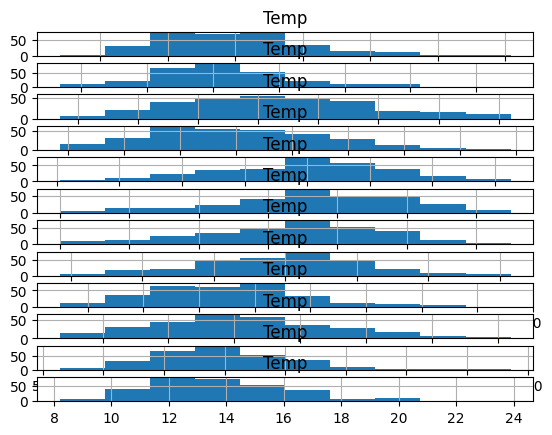

In [22]:
#| code-fold: true
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
            'October', 'November', 'December']
for i in range(1, 13):
    month = i
    ax = plt.subplot(12, 1, month)
    data_1[data_1.index.month == month].hist(ax=ax)
plt.show()


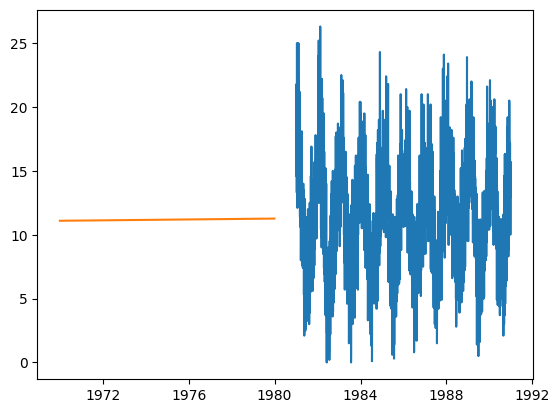

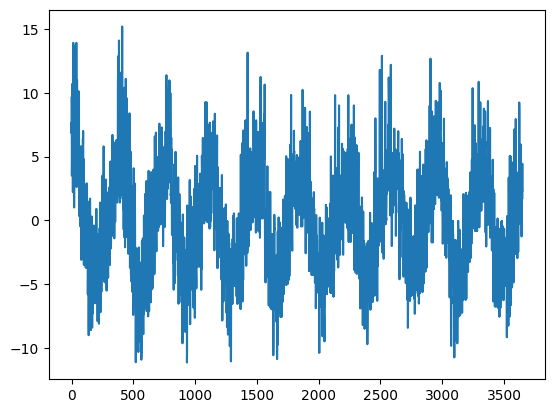

In [35]:
#seasonal adjustment with modeling
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
#fit model
y = data_1['Temp']
X = [i for i in range(0, len(y))]
X = np.reshape(X, (len(X), 1))
model = LinearRegression()
model.fit(X, y)
#calculate trend
trend = model.predict(X)
#plot trend
plt.plot(y)
plt.plot(trend)
plt.show()
#detrend
detrended = [y[i]-trend[i] for i in range(0, len(y))]
#plot detrended
plt.plot(detrended)
plt.show()

Coefficients: [-1.17308000e-08  9.30253946e-06 -2.15977594e-03  1.19147966e-01
  1.38980178e+01]


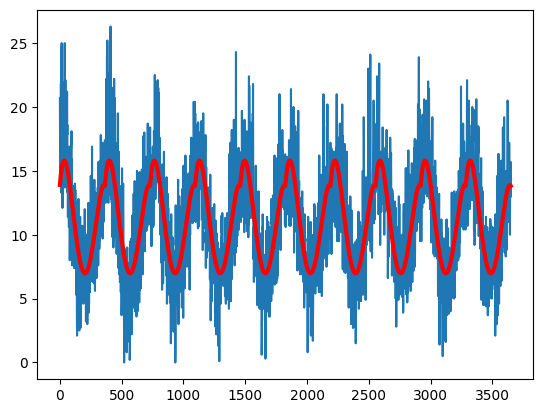

In [54]:
#| code-fold: true
#seasonal adjustment with modeling
#fit polynomial: 4th degree from 1981 to 1992
from numpy import polyfit
X = [i%365 for i in range(0, len(data_1))]
y = data_1['Temp'].values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# plot curve over original data
plt.plot(y)
plt.plot(curve, color='red', linewidth=3)
plt.show()
#detrend
detrended = [y[i]-curve[i] for i in range(0, len(data_1))]


::: callout-note
the curve appears to be a good fit for the seasonal structure in the data

:::

Coefficients: [-1.17308000e-08  9.30253946e-06 -2.15977594e-03  1.19147966e-01
  1.38980178e+01]


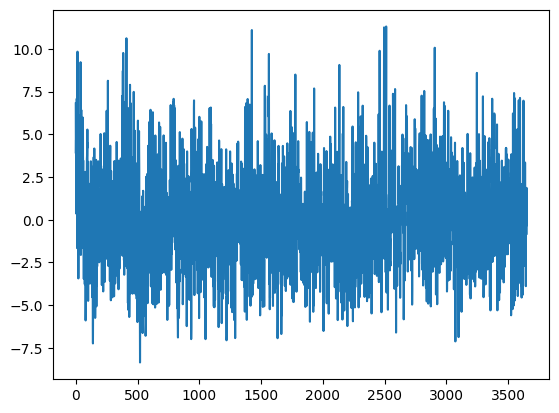

In [55]:
#| code-fold: true
#use the model to create a seasonal adjustment of the dataset
#fit the model
X = [i%365 for i in range(0, len(data_1))]
y = data_1['Temp'].values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# create seasonally adjusted
values = data_1['Temp'].values
diff = list()
for i in range(len(values)):
    value = values[i] - curve[i]
    diff.append(value)
plt.plot(diff)
plt.show()


::: callout-important

* the seasonal component is removed by differencing
* the seasonally adjusted data is the difference between the original data and the seasonal component
* therefore plotted

:::